##Step1:Loading The Data

In [55]:
import pandas as pd
path="/content/drive/MyDrive/WorkSpace2/GIT/Time-Series-Analysis/Data/"

In [56]:
df=pd.read_csv(path+"airline_passengers.csv") #index_col='Month',parse_dates=True
df.head(2)

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118


In [57]:
#df.dropna(inplace=True)
df['Thousands of Passengers'].isna().sum()

0

##Step2:Setting The Index

In [58]:
"""df=pd.read_csv(path+"airline_passengers.csv",index_col='Month',parse_dates=True) #index_col='Month',parse_dates=True
df.head(2)"""
"""
import statsmodels.api as sm
#min(df['Month']),max(df['Month'])
#df.index=pd.Index(sm.tsa.datetools.dates_from_range('1949','1960'))
"""
# Parse strings to datetime type
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)
df = df.set_index(['Month'])
df.head(2)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118


##Step3: Get the Trends,Seasonality and Eroors



```
Error/Trend/Seasonality Model:
The decomposition of a time series attempts to isolate individual components such as error, trend, and seasonality (ETS).
Related Function:
statsmodels.tsa.seasonal.seasonal_decompose(x, model)   Seasonal decomposition using moving averages.
Seasonal Decomposition
Statsmodels provides a seasonal decomposition tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.

We apply an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers).
A multiplicative model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

For these examples we'll use the International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

```



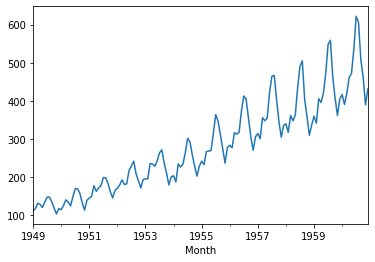

In [59]:
df['Thousands of Passengers'].plot()
#Based on this chart, it looks like the trend in the earlier days is increasing at a higher rate than just linear
# (although it is a bit hard to tell from this one plot).

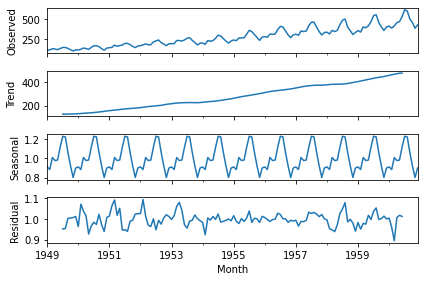

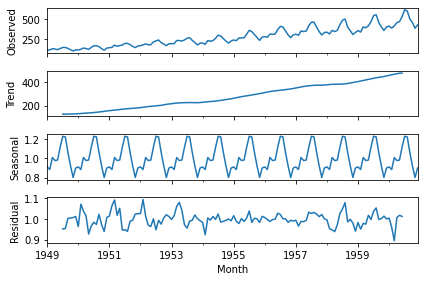

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df['Thousands of Passengers'], model='multiplicative')#'Additive
result.plot()

##Step4: Exponential Smoothing:


```
Apply exponential smoothing models to each of these contributing factors.
```



####Step4.1: SMA: Simple Moving Average




```
Moving Averages:
Compare Simple Moving Averages to Exponentially Weighted Moving Averages in terms of complexity and performance.

Related Functions:
pandas.DataFrame.rolling(window)   Provides rolling window calculations
pandas.DataFrame.ewm(span)         Provides exponential weighted functions
Perform standard imports and load the dataset
Use the International Airline Passengers dataset, 
#which gives monthly totals in thousands from January 1949 to December 1960.
```

In [60]:
df['Moving_Avg_6Months']=df['Thousands of Passengers'].rolling(window=6).mean()
df.head(11)

,Thousands of Passengers,Moving_Avg_6Months
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,124.500000
1949-07-01,148,130.500000
1949-08-01,148,135.500000
1949-09-01,136,136.166667


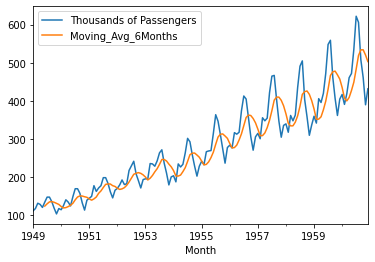

In [61]:
df.plot()

```
Basic SMA has some weaknesses:

>Smaller windows will lead to more noise, rather than signal
>It will always lag by the size of the window
>It will never reach to full peak or valley of the data due to the averaging.
>Does not really inform you about possible future behavior, all it really does is describe trends in your data.
>Extreme historical values can skew your SMA significantly
To help fix some of these issues, we can use an EWMA (Exponentially weighted moving average).
```

####Step4.2: EWMA : Exponentially Weighted Moving Average


In [62]:
#Compare
df['EWMA_12Months'] = df['Thousands of Passengers'].ewm(span=12,adjust=False).mean()
df['SMA_12Months']=df['Thousands of Passengers'].rolling(window=12).mean()
df.head(11)

,Thousands of Passengers,Moving_Avg_6Months,EWMA_12Months,SMA_12Months
Month,,,,
1949-01-01,112,NaN,112.000000,NaN
1949-02-01,118,NaN,112.923077,NaN
1949-03-01,132,NaN,115.857988,NaN
1949-04-01,129,NaN,117.879836,NaN
1949-05-01,121,NaN,118.359861,NaN
1949-06-01,135,124.500000,120.919883,NaN
1949-07-01,148,130.500000,125.086055,NaN
1949-08-01,148,135.500000,128.611277,NaN
1949-09-01,136,136.166667,129.748004,NaN


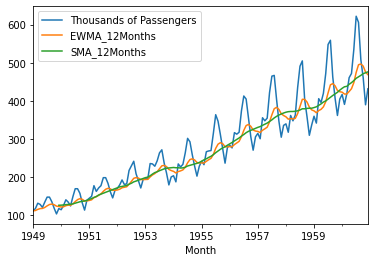

In [65]:
df[['Thousands of Passengers','EWMA_12Months','SMA_12Months']].plot()

####Step4.3: Conclusion

```
Conclusion: Simple Exponential Smoothing
The above example employed Simple Exponential Smoothing with one smoothing factor α. 
Unfortunately, this technique does not work well in forecasting when there is a trend in the data as seen above. 

Look at: 

Double and Triple Exponential Smoothing with the Holt-Winters Methods.
```

